In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
alpha_df = pd.read_csv('/content/drive/MyDrive/Handwritten_alpha_num_dataset/A_2_Z.csv')
alpha_df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,label
0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,D
1,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,E


In [3]:
from google.colab.patches import cv2_imshow

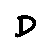

In [14]:
img = alpha_df.iloc[0][:-1].values.reshape(50,50)
cv2_imshow(img)

In [15]:
targets = alpha_df['label']
alpha_df.drop('label', axis=1, inplace=True)

In [17]:
targets = pd.get_dummies(targets)

In [ ]:
num_classes = targets.shape[1]

In [ ]:
train_df = alpha_df.values
train_df.shape, targets.shape

((1430, 2500), (1430, 26))

In [ ]:
train_df = 255 - train_df
train_df = train_df / 255
train_df = train_df.reshape(1430, 50, 50, 1)

In [4]:
from tensorflow.keras.layers import Conv2D, Dense, Dropout, ZeroPadding2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [5]:
!nvidia-smi

Sun Jul 10 14:13:39 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
model = Sequential()

model.add(ZeroPadding2D((1,1), input_shape=(50,50,1)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))


model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))


model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

NameError: ignored

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 52, 52, 1)        0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 50, 50, 64)        640       
                                                                 
 zero_padding2d_1 (ZeroPaddi  (None, 52, 52, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 64)       0         
 )                                                               
                                                        

In [ ]:
model.fit(train_df, targets, validation_split=0.2, epochs=50, batch_size=16)

Epoch 1/50
72/72 [==============================] - 14s 22ms/step - loss: 2.9804 - accuracy: 0.1442 - val_loss: 1.9635 - val_accuracy: 0.4650
Epoch 2/50
72/72 [==============================] - 1s 16ms/step - loss: 1.7359 - accuracy: 0.4738 - val_loss: 1.0949 - val_accuracy: 0.7028
Epoch 3/50
72/72 [==============================] - 1s 15ms/step - loss: 1.0550 - accuracy: 0.6748 - val_loss: 0.8470 - val_accuracy: 0.7692
Epoch 4/50
72/72 [==============================] - 1s 16ms/step - loss: 0.7875 - accuracy: 0.7570 - val_loss: 0.8055 - val_accuracy: 0.7448
Epoch 5/50
72/72 [==============================] - 1s 15ms/step - loss: 0.5943 - accuracy: 0.8059 - val_loss: 0.6318 - val_accuracy: 0.8217
Epoch 6/50
72/72 [==============================] - 1s 16ms/step - loss: 0.5292 - accuracy: 0.8392 - val_loss: 0.5868 - val_accuracy: 0.8531
Epoch 7/50
72/72 [==============================] - 1s 15ms/step - loss: 0.4386 - accuracy: 0.8619 - val_loss: 0.5968 - val_accuracy: 0.8322
Epoch 8/50
7

In [7]:
alphabet_dict = {
    0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',
    13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'
}

In [ ]:
model.save('/content/drive/MyDrive/Handwritten_alpha_num_dataset/alpha_cnn_14_6.h5')

In [8]:
from tensorflow.keras.models import load_model
alpha_model = load_model('/content/drive/MyDrive/Handwritten_alpha_num_dataset/alpha_cnn_14_6.h5')

In [11]:
import cv2

In [9]:
from google.colab.patches import cv2_imshow

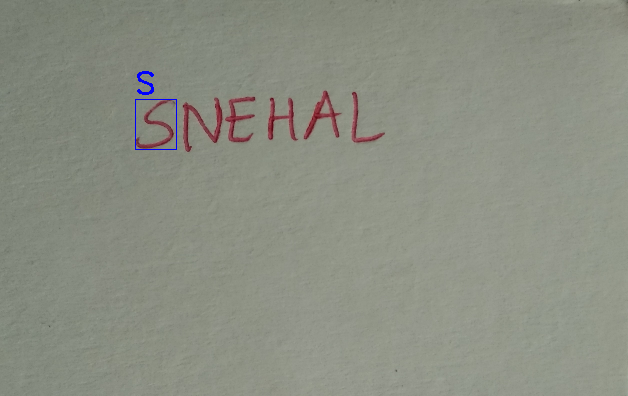

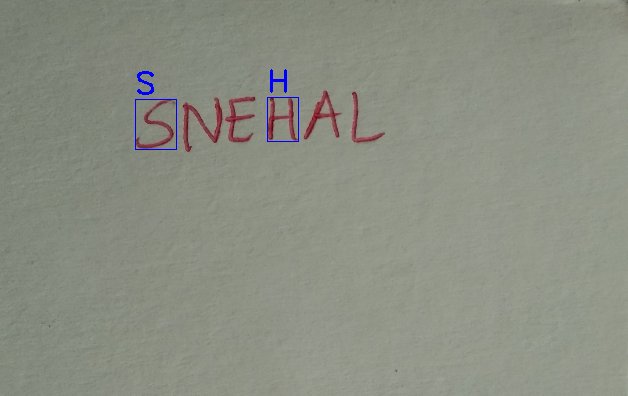

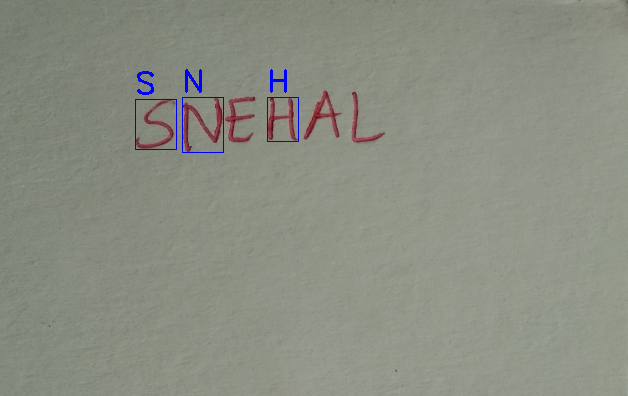

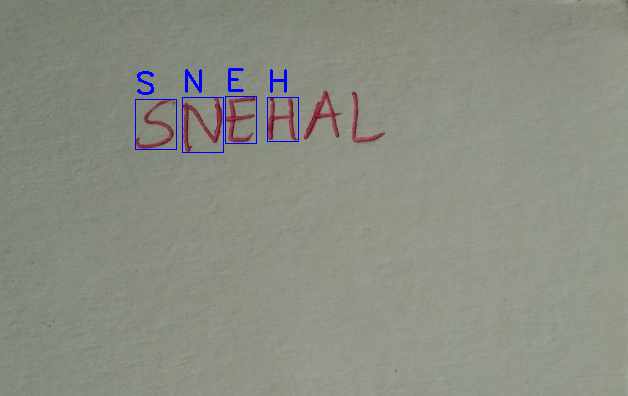

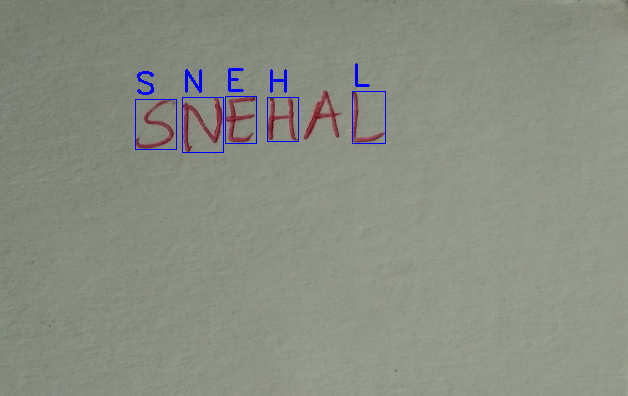

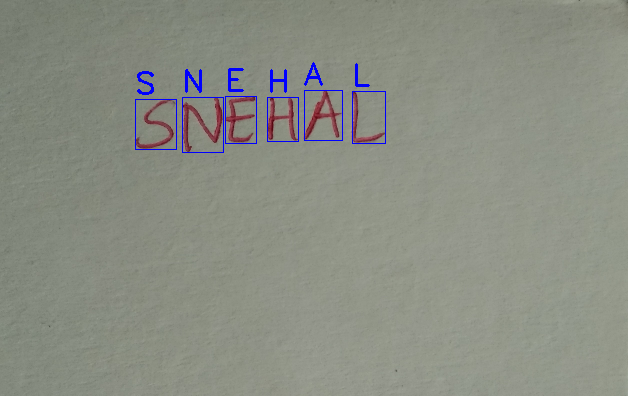

In [12]:
image = cv2.imread('/content/drive/MyDrive/Handwritten_alpha_num_dataset/IMG_20220614_161340~2.jpg')
image1 =  cv2.resize(image, None, fx=0.25, fy=0.25)
image_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(image1, (3,3), 2)
canny = cv2.Canny(blurred, 30,100)
contours, hierachy = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(blurred, contours, -1, (25,255,0), 1)

for c in contours:
    (x, y, w, h) = cv2.boundingRect(c)
    
    if w>=5 and h>=25:
        roi = image_gray[y:y+h, x:x+w]

        ret, roi = cv2.threshold(roi, 127, 255, cv2.THRESH_BINARY_INV)

        roi = cv2.copyMakeBorder(roi, 30, 30, 30, 30, cv2.BORDER_CONSTANT, value=(0,0,0))

        roi1 = cv2.resize(roi, (50,50), cv2.INTER_AREA)

        roi1 = roi1.reshape(1, 50, 50, 1)
        

        predict_x=alpha_model.predict(roi1) 
        res = (predict_x > 0.5).astype('int32')
        for i in range(0,len(res[0]),1):
          if (res[0][i] == 1):
            result = alphabet_dict[i]
            cv2.rectangle(image1, (x,y), (x+w, y+h), (255,0,0), 1)
            cv2.putText(image1, result, (x, y-6), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2)

        cv2_imshow(image1)

cv2.destroyAllWindows()